<a href="https://colab.research.google.com/github/Sunay-2103/SunayMukherjee_23FE10CSE00636/blob/main/Cricket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("/t20_bbb.csv")
df.head()

/tmp/ipython-input-791270360.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/t20_bbb.csv")


,p_match,inns,bat,p_bat,team_bat,bowl,p_bowl,team_bowl,ball,ball_id,...,bat_out,wagonX,wagonY,wagonZone,line,length,shot,control,predscore,wprob
0,1001349,1,Aaron Finch,5334,Australia,Lasith Malinga,49758,Sri Lanka,1,0.01,...,True,208.0,178.0,3.0,ON_THE_STUMPS,SHORT_OF_A_GOOD_LENGTH,DEFENDED,0.0,-1.0,-1.0
1,1001349,1,Aaron Finch,5334,Australia,Lasith Malinga,49758,Sri Lanka,2,0.02,...,True,243.0,175.0,3.0,ON_THE_STUMPS,GOOD_LENGTH,DEFENDED,1.0,-1.0,-1.0
2,1001349,1,Aaron Finch,5334,Australia,Lasith Malinga,49758,Sri Lanka,3,0.03,...,True,189.0,242.0,4.0,ON_THE_STUMPS,SHORT_OF_A_GOOD_LENGTH,DEFENDED,0.0,-1.0,-1.0
3,1001351,1,Aaron Finch,5334,Australia,Lasith Malinga,49758,Sri Lanka,3,0.03,...,True,166.0,194.0,5.0,OUTSIDE_OFFSTUMP,SHORT_OF_A_GOOD_LENGTH,DEFENDED,1.0,-1.0,-1.0
4,1001351,1,Aaron Finch,5334,Australia,Lasith Malinga,49758,Sri Lanka,4,0.04,...,True,15.0,222.0,6.0,OUTSIDE_OFFSTUMP,GOOD_LENGTH,CUT_SHOT,1.0,-1.0,-1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53205 entries, 0 to 53204
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   p_match         53205 non-null  int64  
 1   inns            53205 non-null  int64  
 2   bat             53205 non-null  object 
 3   p_bat           53205 non-null  int64  
 4   team_bat        53205 non-null  object 
 5   bowl            53205 non-null  object 
 6   p_bowl          53205 non-null  int64  
 7   team_bowl       53205 non-null  object 
 8   ball            53205 non-null  int64  
 9   ball_id         53205 non-null  float64
 10  outcome         53205 non-null  object 
 11  score           53205 non-null  int64  
 12  out             53205 non-null  bool   
 13  dismissal       2965 non-null   object 
 14  p_out           53205 non-null  int64  
 15  over            53205 non-null  int64  
 16  noball          53205 non-null  int64  
 17  wide            53205 non-null 

In [10]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,p_match,inns,p_bat,p_bowl,ball,ball_id,score,p_out,over,noball,...,year,batruns,ballfaced,bowlruns,wagonX,wagonY,wagonZone,control,predscore,wprob
count,5.320500e+04,53205.000000,5.320500e+04,53205.00000,53205.000000,53205.000000,53205.000000,5.320500e+04,53205.000000,53205.000000,...,53205.000000,53204.000000,53204.000000,53204.000000,53204.000000,53204.000000,53204.000000,38118.000000,53204.000000,53204.000000
mean,1.101002e+06,1.431595,3.404819e+05,324400.64524,3.605018,9.321869,1.294709,3.406098e+05,10.285819,0.004135,...,2018.264111,1.227013,0.970303,1.266690,118.049902,122.336422,2.881080,0.770869,99.569205,29.009183
std,1.480694e+05,0.495303,2.882725e+05,191697.73825,1.801031,5.747380,1.566935,2.883376e+05,5.747364,0.079361,...,2.200527,1.579406,0.169752,1.571884,114.937704,111.834012,2.682556,0.420279,79.599015,31.403681
min,7.223350e+05,1.000000,4.068000e+03,4864.00000,1.000000,0.010000,0.000000,4.068000e+03,1.000000,0.000000,...,2015.000000,-4.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
10%,8.958190e+05,1.000000,9.062000e+03,44149.00000,1.000000,1.060000,0.000000,9.062000e+03,2.000000,0.000000,...,2015.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,1.001351e+06,1.000000,5.074700e+04,240609.00000,2.000000,4.060000,0.000000,5.074700e+04,5.000000,0.000000,...,2016.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,-1.000000
50%,1.144990e+06,1.000000,3.087980e+05,308251.00000,4.000000,9.050000,1.000000,3.087980e+05,10.000000,0.000000,...,2018.000000,1.000000,1.000000,1.000000,114.000000,134.000000,3.000000,1.000000,146.000000,23.120000
75%,1.216532e+06,2.000000,5.002680e+05,429738.00000,5.000000,14.060000,1.000000,5.002680e+05,15.000000,0.000000,...,2020.000000,1.000000,1.000000,1.000000,215.000000,204.000000,5.000000,1.000000,164.000000,52.000000
90%,1.269689e+06,2.000000,7.742214e+05,489889.00000,6.000000,17.050000,4.000000,7.742230e+05,18.000000,0.000000,...,2021.000000,4.000000,1.000000,4.000000,293.000000,279.000000,7.000000,1.000000,178.000000,76.467000
max,1.327756e+06,2.000000,1.323727e+06,787073.00000,10.000000,19.090000,8.000000,1.323727e+06,20.000000,6.000000,...,2022.000000,6.000000,1.000000,8.000000,379.000000,377.000000,8.000000,1.000000,247.000000,100.000000


In [11]:
df.describe()

,p_match,inns,p_bat,p_bowl,ball,ball_id,score,p_out,over,noball,...,year,batruns,ballfaced,bowlruns,wagonX,wagonY,wagonZone,control,predscore,wprob
count,5.320500e+04,53205.000000,5.320500e+04,53205.00000,53205.000000,53205.000000,53205.000000,5.320500e+04,53205.000000,53205.000000,...,53205.000000,53204.000000,53204.000000,53204.000000,53204.000000,53204.000000,53204.000000,38118.000000,53204.000000,53204.000000
mean,1.101002e+06,1.431595,3.404819e+05,324400.64524,3.605018,9.321869,1.294709,3.406098e+05,10.285819,0.004135,...,2018.264111,1.227013,0.970303,1.266690,118.049902,122.336422,2.881080,0.770869,99.569205,29.009183
std,1.480694e+05,0.495303,2.882725e+05,191697.73825,1.801031,5.747380,1.566935,2.883376e+05,5.747364,0.079361,...,2.200527,1.579406,0.169752,1.571884,114.937704,111.834012,2.682556,0.420279,79.599015,31.403681
min,7.223350e+05,1.000000,4.068000e+03,4864.00000,1.000000,0.010000,0.000000,4.068000e+03,1.000000,0.000000,...,2015.000000,-4.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,1.001351e+06,1.000000,5.074700e+04,240609.00000,2.000000,4.060000,0.000000,5.074700e+04,5.000000,0.000000,...,2016.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,-1.000000
50%,1.144990e+06,1.000000,3.087980e+05,308251.00000,4.000000,9.050000,1.000000,3.087980e+05,10.000000,0.000000,...,2018.000000,1.000000,1.000000,1.000000,114.000000,134.000000,3.000000,1.000000,146.000000,23.120000
75%,1.216532e+06,2.000000,5.002680e+05,429738.00000,5.000000,14.060000,1.000000,5.002680e+05,15.000000,0.000000,...,2020.000000,1.000000,1.000000,1.000000,215.000000,204.000000,5.000000,1.000000,164.000000,52.000000
max,1.327756e+06,2.000000,1.323727e+06,787073.00000,10.000000,19.090000,8.000000,1.323727e+06,20.000000,6.000000,...,2022.000000,6.000000,1.000000,8.000000,379.000000,377.000000,8.000000,1.000000,247.000000,100.000000


In [12]:
df.columns

Index(['p_match', 'inns', 'bat', 'p_bat', 'team_bat', 'bowl', 'p_bowl',
       'team_bowl', 'ball', 'ball_id', 'outcome', 'score', 'out', 'dismissal',
       'p_out', 'over', 'noball', 'wide', 'byes', 'legbyes', 'cur_bat_runs',
       'cur_bat_bf', 'cur_bowl_ovr', 'cur_bowl_wkts', 'cur_bowl_runs',
       'inns_runs', 'inns_wkts', 'inns_balls', 'inns_runs_rem',
       'inns_balls_rem', 'inns_rr', 'inns_rrr', 'target', 'max_balls', 'date',
       'year', 'ground', 'country', 'winner', 'toss', 'competition',
       'bat_hand', 'bowl_style', 'bowl_kind', 'batruns', 'ballfaced',
       'bowlruns', 'bat_out', 'wagonX', 'wagonY', 'wagonZone', 'line',
       'length', 'shot', 'control', 'predscore', 'wprob'],
      dtype='object')

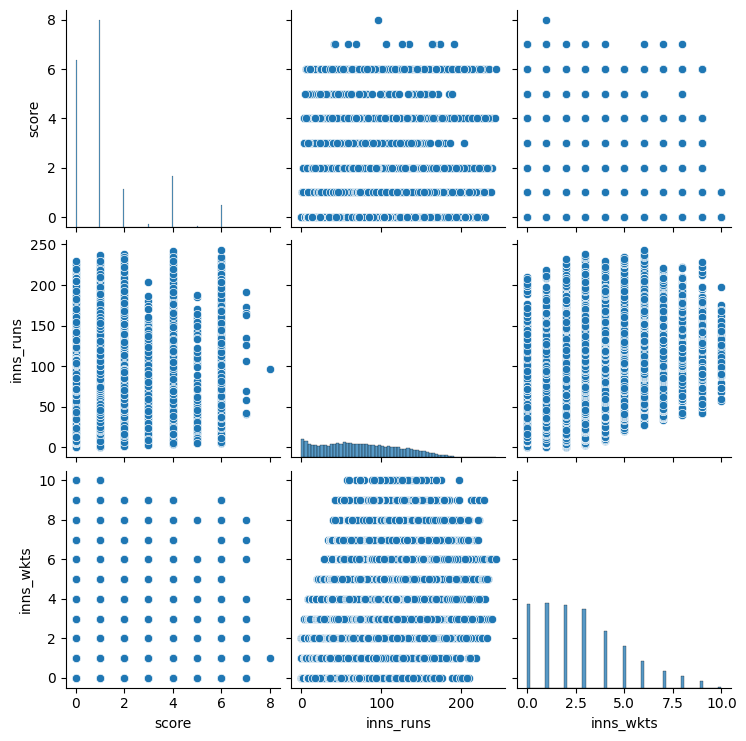

In [14]:
sns.pairplot(df, vars=['score', 'inns_runs', 'inns_wkts'])


<Axes: ylabel='Frequency'>

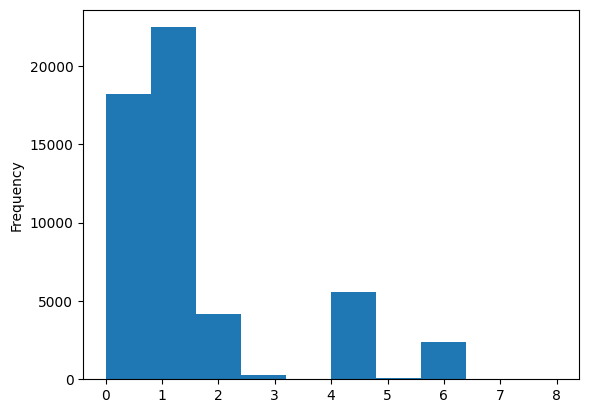

In [15]:
df['score'].plot.hist()

<Axes: ylabel='Density'>

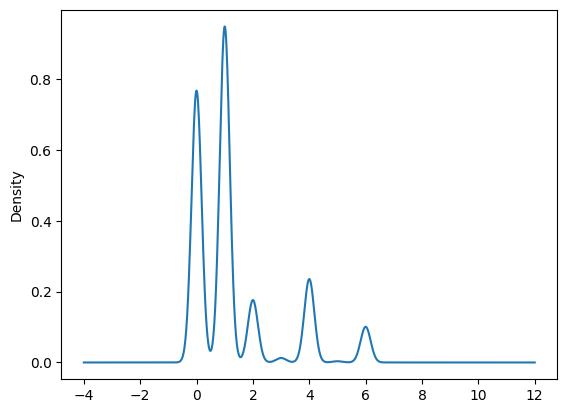

In [16]:
df['score'].plot.density()